Môn: Mạng neural và giải thuật di truyền

Họ và tên: Đặng Văn Minh

MSSV: 19521832

# 1 - Task

* Cài đặt Genetic Algorithm theo bản cài đặt **POPOP** (không sử dụng mutation).

* thực nghiệm bản cài đặt của mình với các **problem size** của hàm OneMax tăng dần như sau: 8, 16, 32, 64, 128

* Ở đầu mỗi lượt chạy, khi khởi tạo quần thể, thì cần đặt lại **random seed**. Hãy chọn random seed là MSSV của mình.

* Với mỗi problem size, hãy chọn ra **population size** có khả năng tìm ra được lời giải tối ưu (không chạy quá 50 thế hệ). 

> Bài nộp: 1 file ipynb (Ở cuối file viết một đoạn bình luận ngắn thống kế và nhận xét về kết quả thực nghiệm).

# 1 - Packages

In [203]:
import numpy as np

# 2 - Code POPOP

## 2.1 Initialize population

In [204]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [205]:
np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 1 1 0]
 [1 0 1 1]
 [1 1 1 1]
 [1 1 0 0]]


## 2.2 One max

In [206]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [207]:
onemax(pop[5,:])

3

## 2.3 - crossover

In [208]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

## 2.4 Tournament selection

In [209]:
def tournament_selection(parent_population, population_size, tourament_size): 

    n_tournament = len(parent_population) // tournament_size
    n_loop = population_size // n_tournament
    pop = []
    
    for i in range(n_loop):
        np.random.shuffle(parent_population)
        pop_fitness = np.array([onemax(ind) for ind in parent_population])
        
        for tournament in range(n_tournament):
            
            begin_point = tournament * tournament_size
            
            idx_max = np.argmax(pop_fitness[begin_point:begin_point+tournament_size])
            pop.append(np.copy(parent_population[idx_max + begin_point]))
        
    return np.array(pop)

In [210]:
a = np.arange(5)
np.random.seed(19521832)
print(a)
np.random.shuffle(a)
print(a)
np.random.shuffle(a)
print(a)

[0 1 2 3 4]
[4 1 0 3 2]
[2 3 4 1 0]


## 2.5 Check convergence

In [211]:
def convergence(pop):
    """
    Convergence when individuals is all the same ==> column is all the same
    Args: 
        - Population: (n_individuals, n_variables)
    Return:
        - True if all inds same else False
    """
    n_ind, n_var = pop.shape
    
    arr = pop.sum(axis=0)
    
    for i in range(n_var):
        if arr[i] != 0 and arr[i] != n_ind:
            return False
    return True

In [212]:
arr = np.array([[0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1]])
convergence(arr)

True

## 2.6 - POPOP

In [213]:
def POPOP_genetic_algorithm(num_individuals, num_parameters, tournament_size):
    # Initialize individuals
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([onemax(ind) for ind in pop])
    print(f'Initialized population:\n {pop}')
    
    generations = 0
    print(f'Gen: 0')
    print(pop_fitness)
    
    while True:
        # check convergence of population
        if convergence(pop) == True: 
            break  
        # if not converge, create new generation
        generations += 1
            
        # Create offstring use crossover, do not use mutation
        offstring = crossover(pop)
        
        # P + O pool
        P_O_pop = np.vstack((pop, offstring))
        
        # Select parent for next generation
        pop = tournament_selection(P_O_pop, num_individuals, tournament_size)
        pop_fitness = np.array([onemax(ind) for ind in pop])
        
        print(f'Gen: {generations}') 
        print(pop_fitness)
        
    print('# Final result:')
    print(pop)
    print(pop_fitness)
        
    # return 1 if can find optimal solution else 0      
    is_optimal = 0
    if (pop_fitness == num_parameters).all():
        is_optimal = 1
    reutrn = is_optimal
    

## Problem size - 8

In [214]:
num_parameters =  8
num_individuals = 4
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(num_individuals, num_parameters, tournament_size)

Initialized population:
 [[0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1]
 [0 1 0 1 1 0 1 1]
 [0 1 0 0 0 1 1 0]]
Gen: 0
[4 8 5 3]
Gen: 1
[8 6 7 8]
Gen: 2
[8 8 8 8]
# Final result:
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[8 8 8 8]


## Problem size - 16

In [215]:
problem_size =  16
num_individuals = 12
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(num_individuals, problem_size, tournament_size)

Initialized population:
 [[0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0]
 [0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
 [0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0]
 [0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0]
 [1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1]
 [0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0]
 [1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1]
 [1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1]
 [0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1]]
Gen: 0
[12  8  8  6  8  6 12  8 11 10  6  7]
Gen: 1
[12 11 12 10 10 11 12 10 12 10 11 11]
Gen: 2
[13 12 13 12 12 12 12 12 13 13 12 12]
Gen: 3
[13 13 13 14 13 13 13 13 14 13 13 13]
Gen: 4
[13 13 14 14 14 13 14 14 13 14 14 14]
Gen: 5
[14 14 15 15 15 14 14 14 14 15 14 15]
Gen: 6
[15 15 16 15 15 16 15 16 15 15 15 16]
Gen: 7
[16 16 16 16 16 16 16 16 15 16 16 16]
Gen: 8
[16 16 16 16 16 16 16 16 16 16 16 16]
# Final result:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 

## Problem size - 32

In [216]:
problem_size =  32
num_individuals = 18
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(num_individuals, problem_size, tournament_size)

Initialized population:
 [[0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0]
 [0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0]
 [1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0]
 [1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1]
 [0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0]
 [0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1]
 [0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1]
 [1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0]
 [1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1

## Problem size - 64

In [217]:
problem_size =  64
num_individuals = 40
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(num_individuals, problem_size, tournament_size)

Initialized population:
 [[0 1 0 ... 1 0 1]
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 1]]
Gen: 0
[34 34 34 22 26 32 34 29 34 35 29 29 24 28 35 39 33 29 34 26 29 35 31 29
 31 34 30 35 38 31 30 31 35 28 33 35 34 26 30 32]
Gen: 1
[35 38 35 34 34 35 35 37 35 31 34 33 38 30 35 39 36 34 38 34 32 35 35 36
 34 38 31 35 33 38 38 35 34 39 33 35 31 35 34 35]
Gen: 2
[35 38 35 35 38 36 38 39 37 39 38 40 37 36 37 39 42 38 38 37 42 38 37 35
 39 37 35 37 35 35 38 38 39 39 38 39 38 36 40 38]
Gen: 3
[39 44 43 42 42 46 38 39 37 38 43 42 39 40 39 37 41 40 40 42 42 44 43 40
 43 39 42 38 42 40 42 38 41 38 42 39 38 46 39 39]
Gen: 4
[44 41 43 42 46 43 48 41 43 43 44 42 42 43 43 42 49 42 43 46 46 43 42 44
 42 46 44 43 43 44 42 38 43 42 42 42 48 49 41 41]
Gen: 5
[46 44 48 44 44 51 44 43 49 48 46 50 44 48 48 46 47 43 48 49 48 48 48 49
 44 45 44 51 49 43 48 46 47 44 50 43 48 46 46 43]
Gen: 6
[48 49 49 51 51 50 48 46 49 48 51 49 49 50 50 46 49 50 49 48 49 50 4

## Problem size - 128

In [218]:
problem_size =  128
num_individuals = 76
tournament_size = 4
np.random.seed(19521832)
POPOP_genetic_algorithm(num_individuals, problem_size, tournament_size)

Initialized population:
 [[0 1 0 ... 1 1 0]
 [1 0 1 ... 1 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [0 0 1 ... 1 1 0]]
Gen: 0
[68 56 58 63 69 58 52 74 62 60 64 60 65 65 69 61 63 68 60 62 56 66 61 65
 71 69 62 63 59 64 63 61 65 70 59 81 62 68 79 59 54 68 62 59 52 59 61 59
 63 63 58 62 60 69 81 60 56 59 54 69 57 64 72 65 68 56 69 65 55 59 65 64
 55 62 61 63]
Gen: 1
[67 62 68 72 71 68 72 79 67 69 59 68 81 63 68 64 61 72 69 65 69 74 81 68
 65 67 76 68 65 65 75 73 65 68 69 72 68 68 65 76 64 68 71 68 73 62 67 69
 68 68 65 63 71 64 59 69 81 65 62 72 72 65 81 65 66 74 70 68 70 69 67 71
 72 69 79 68]
Gen: 2
[77 77 72 69 73 77 77 72 73 70 76 79 73 71 80 77 75 81 72 73 70 69 70 79
 68 73 79 72 69 75 73 81 68 81 71 68 72 73 72 72 72 77 68 70 71 72 74 77
 81 68 70 73 73 79 76 70 70 68 75 81 69 65 81 70 77 79 73 73 73 80 81 69
 72 76 74 72]
Gen: 3
[70 80 73 80 79 81 85 81 81 79 77 75 81 77 79 72 76 79 77 76 74 73 73 81
 79 81 81 81 79 79 80 77 75 83 77 78 77 77 78 81 73 75 

# 3 - Thống kê và nhận xét

**Thống kê kết quả**:

| Problem size | Population size | Generations |
| :-----------: | :------------: |:---------: |
| 8 | 4 | 2 |
| 16 | 12 | 8 |
| 32 | 18 | 13 |
| 64 | 40 | 19 |
| 128 | 76 | 28 |

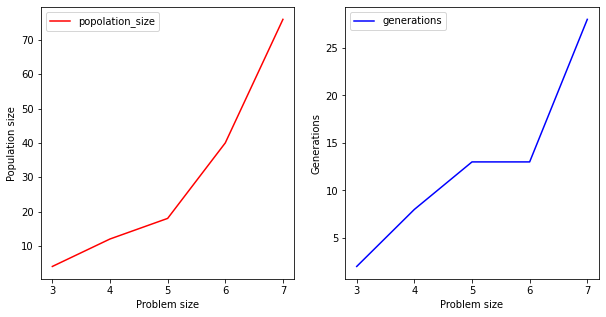

In [219]:
# visualize result
import matplotlib.pyplot as plt

problem_size = np.array([8, 16, 32, 64, 128])
population_size = np.array([4, 12, 18, 40, 76])
generations = np.array([2, 8, 13, 13, 28])
log_problem_size = np.log2(problem_size)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(log_problem_size, population_size, color='red', label='popolation_size')
ax[0].set_xlabel('Problem size')
ax[0].set_ylabel('Population size')
ax[0].legend()

ax[1].plot(log_problem_size, generations, color='blue', label='generations')
ax[1].set_xlabel('Problem size')
ax[1].set_ylabel('Generations')
ax[1].legend()

plt.show()

**Nhận xét**

Thuật toán POPOP (với random seed: 19521832) có kết quả:
* Khi problem size tăng thì population size và generations cũng tăng, tức cần kích thước quần thể lớn hơn và cần qua nhiều thế hệ hơn để giải quyết problem size lớn hơn

**Ưu điểm của POPOP**
 * Với cài đặt tournament selection, fitness có thể âm có thể dương, có ưu điểm hơn proportional selection
 * Đáp ứng được tính Elitsm